,Open,High,Low,Close,Volume
2023-01-24,80.5300,80.6300,79.1150,80.2500,1.159085e+06
2023-01-19,81.1800,81.3000,79.7300,79.7800,1.444066e+06
2023-01-13,84.6900,84.7900,83.0600,84.0200,1.726089e+06
2023-01-10,85.3800,85.7900,84.9100,85.6900,1.072788e+06
2023-01-04,84.8800,85.8400,84.5800,85.3300,1.502200e+06
...,...,...,...,...,...
2018-02-05,51.0238,51.4818,50.3928,50.3928,4.716617e+06
2018-02-02,50.4446,51.4729,50.1423,51.2753,7.546698e+06
2018-02-01,54.5462,54.7898,51.2567,51.9759,3.340752e+06
2018-02-01,54.5462,54.7898,51.2567,51.9759,1.670376e+06


,Open,High,Low,Close,Volume,Date,WEEK
2023-01-24,80.5300,80.6300,79.1150,80.2500,1.159085e+06,2023-01-24,264
2023-01-19,81.1800,81.3000,79.7300,79.7800,1.444066e+06,2023-01-19,263
2023-01-13,84.6900,84.7900,83.0600,84.0200,1.726089e+06,2023-01-13,262
2023-01-10,85.3800,85.7900,84.9100,85.6900,1.072788e+06,2023-01-10,262
2023-01-04,84.8800,85.8400,84.5800,85.3300,1.502200e+06,2023-01-04,261
...,...,...,...,...,...,...,...
2018-02-05,51.0238,51.4818,50.3928,50.3928,4.716617e+06,2018-02-05,6
2018-02-02,50.4446,51.4729,50.1423,51.2753,7.546698e+06,2018-02-02,5
2018-02-01,54.5462,54.7898,51.2567,51.9759,3.340752e+06,2018-02-01,5
2018-02-01,54.5462,54.7898,51.2567,51.9759,1.670376e+06,2018-02-01,5


the auto correlation is  0.9858877894237776


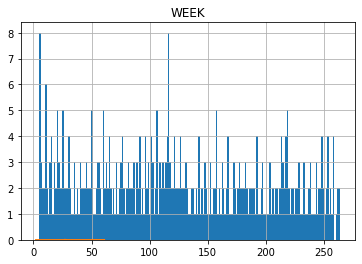

the var of variances is,  1.4804022683785018e-06
The Jarque Bera Test shows:  Jarque_beraResult(statistic=714.5372283315128, pvalue=0.0)


In [78]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import math
import matplotlib.pyplot as plt
import scipy.stats

f = web.DataReader('es', 'stooq')
median = f.describe()['Volume']['50%']

#I'm not sure how to handle the case, if the volume cutoff is less than any of the values in the data set. 
# I ended up resampling the data that many times, with half the volume in each. 
# I'm not sure if this is the best way to handle it, but it seems to work.

volumeCutoff = median * 3

newVolumeBars = pd.DataFrame()

fill = 0
for i in range(len(f)):
    fill += f.iloc[i]['Volume']
    if(fill > volumeCutoff):
        repeats = math.floor(fill / volumeCutoff)
        for j in range(repeats):
            newAdd = f.iloc[i]
            newAdd['Volume'] = newAdd['Volume'] / repeats
            newVolumeBars = pd.concat([newVolumeBars,newAdd], axis=1)
            fill = fill - volumeCutoff
newVolumeBars = newVolumeBars.T
display(newVolumeBars)
newVolumeBars['Date'] = pd.to_datetime(newVolumeBars.index, infer_datetime_format=True)
newVolumeBars['WEEK'] = newVolumeBars['Date'].dt.isocalendar().week + (newVolumeBars['Date'].dt.isocalendar().year-2018) * 52
display(newVolumeBars)
newVolumeBars.hist(column='WEEK', bins=52*4)
print("the auto correlation is ", newVolumeBars.Close.autocorr(lag=1))


#group by months, can calculate the variance of returns in each month, and then calculate the average of those variances.
newVolumeBars['Month'] = newVolumeBars['Date'].dt.month + (newVolumeBars['Date'].dt.isocalendar().year-2018) * 12
newVolumeBars['Return'] = newVolumeBars['Close'].pct_change()
newVolumeBars['Return'] = newVolumeBars['Return'].fillna(0)

returns_monthly_var = newVolumeBars.groupby('Month')['Return'].var()
plt.plot(returns_monthly_var)
plt.show()
print("the var of variances is, ", returns_monthly_var.var())
print("The Jarque Bera Test shows: ", scipy.stats.jarque_bera(newVolumeBars['Return']))


,Open,High,Low,Close,Volume
2023-01-25,79.6000,79.9800,78.8900,79.7100,1.934704e+06
2023-01-23,79.6700,80.6600,79.3400,79.8900,1.602738e+06
2023-01-20,79.7900,80.1000,77.3900,79.7400,2.319621e+06
2023-01-18,84.0400,84.2000,80.7700,81.2100,1.766036e+06
2023-01-13,84.6900,84.7900,83.0600,84.0200,1.726089e+06
...,...,...,...,...,...
2018-02-06,49.8399,50.0533,49.0376,49.7098,4.104468e+06
2018-02-05,51.0238,51.4818,50.3928,50.3928,4.716617e+06
2018-02-02,50.4446,51.4729,50.1423,51.2753,3.773349e+06
2018-02-02,50.4446,51.4729,50.1423,51.2753,1.886675e+06


,Open,High,Low,Close,Volume,Date,WEEK
2023-01-25,79.6000,79.9800,78.8900,79.7100,1.934704e+06,2023-01-25,264
2023-01-23,79.6700,80.6600,79.3400,79.8900,1.602738e+06,2023-01-23,264
2023-01-20,79.7900,80.1000,77.3900,79.7400,2.319621e+06,2023-01-20,263
2023-01-18,84.0400,84.2000,80.7700,81.2100,1.766036e+06,2023-01-18,263
2023-01-13,84.6900,84.7900,83.0600,84.0200,1.726089e+06,2023-01-13,262
...,...,...,...,...,...,...,...
2018-02-06,49.8399,50.0533,49.0376,49.7098,4.104468e+06,2018-02-06,6
2018-02-05,51.0238,51.4818,50.3928,50.3928,4.716617e+06,2018-02-05,6
2018-02-02,50.4446,51.4729,50.1423,51.2753,3.773349e+06,2018-02-02,5
2018-02-02,50.4446,51.4729,50.1423,51.2753,1.886675e+06,2018-02-02,5


the auto correlation is  0.9858877894237776


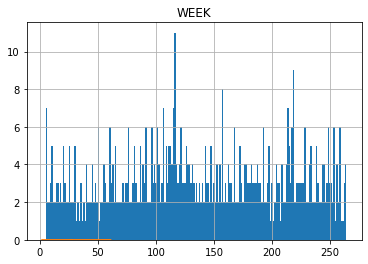

the var of variances is,  5.675339228800005e-07
The Jarque Bera Test shows:  Jarque_beraResult(statistic=2262.542762731998, pvalue=0.0)


In [79]:
dollarCutoff = median * 3 *50

newDollarBars = pd.DataFrame()

fill = 0
for i in range(len(f)):
    fill += (f.iloc[i]['Volume'] * f.iloc[i]['Close'])
    if(fill > dollarCutoff):
        repeats = math.floor(fill / dollarCutoff)
        for j in range(repeats):
            newAdd = f.iloc[i]
            newAdd['Volume'] = newAdd['Volume'] / repeats
            newDollarBars = pd.concat([newDollarBars,newAdd], axis=1)
            fill = fill - dollarCutoff

newDollarBars = newDollarBars.T
display(newDollarBars)
newDollarBars['Date'] = pd.to_datetime(newDollarBars.index, infer_datetime_format=True)
newDollarBars['WEEK'] = newDollarBars['Date'].dt.isocalendar().week + (newDollarBars['Date'].dt.isocalendar().year-2018) * 52

display(newDollarBars)
newDollarBars.hist(column='WEEK', bins=52*4)
print("the auto correlation is ", newVolumeBars.Close.autocorr(lag=1))


#group by months, can calculate the variance of returns in each month, and then calculate the average of those variances.
newDollarBars['Month'] = newDollarBars['Date'].dt.month + (newDollarBars['Date'].dt.isocalendar().year-2018) * 12
newDollarBars['Return'] = newDollarBars['Close'].pct_change()
newDollarBars['Return'] = newDollarBars['Return'].fillna(0)

returns_monthly_var = newDollarBars.groupby('Month')['Return'].var()
plt.plot(returns_monthly_var)
plt.show()
print("the var of variances is, ", returns_monthly_var.var())
print("The Jarque Bera Test shows: ", scipy.stats.jarque_bera(newDollarBars['Return']))
